In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression

In [16]:
df = pd.read_csv("C:\\Users\\Deependra\\Downloads\\archive (1)\\Titanic-Dataset.csv")

In [17]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

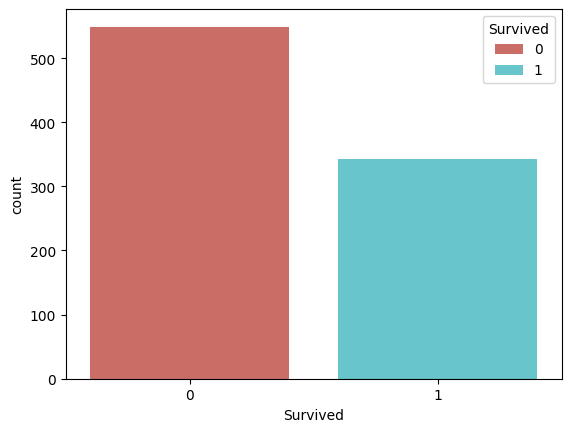

In [18]:
sns.countplot(data = df , x ='Survived' ,  hue = 'Survived' ,palette = 'hls')

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
samdf = df.drop(["Name","Ticket","Cabin"],axis =1)

In [21]:
samdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
grp = samdf.groupby(df["Parch"])

In [23]:
grp.mean(numeric_only = True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Parch,,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,0.0,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,1.0,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,2.0,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,3.0,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,4.0,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,5.0,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,6.0,46.900000


In [24]:
def age_approx(cols):
    Age = cols.iloc[0]
    Parch = cols.iloc[1]
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        if Parch == 1:
            return 24
        if Parch == 2:
            return 17
        if Parch == 3:
            return 33
        if Parch == 4:
            return 45
        if Parch == 5:
            return 39
        if Parch == 6:
            return 43
    else:
        return Age

In [25]:
samdf["Age"] = samdf[["Age", "Parch"]].apply(age_approx , axis =1)

In [26]:
samdf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [27]:
samdf.dropna(inplace = True)
samdf.reset_index(inplace = True , drop = True)

In [28]:
samdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.6+ KB


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
labenc = LabelEncoder()

In [31]:
enc_gender = labenc.fit_transform(samdf['Sex'])
enc_gender = pd.DataFrame(enc_gender , columns = ["gender"])

In [32]:
enc_gender.head()

,gender
0,1
1,0
2,0
3,0
4,1


In [33]:
from sklearn.preprocessing import OneHotEncoder

In [34]:
oneenc = OneHotEncoder()

In [37]:
embarked_label = labenc.fit_transform(samdf['Embarked'])

In [41]:
enc_embarked = oneenc.fit_transform(embarked_label.reshape(-1,1))

In [42]:
enc_mat = enc_embarked.toarray()

In [43]:
embdf = pd.DataFrame(enc_mat , columns = ['S','C','Q'])

In [44]:
embdf.head()

,S,C,Q
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [90]:
samdf.drop(['Sex','Embarked'], axis = 1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
884,887,0,2,27.0,0,0,13.0000
885,888,1,1,19.0,0,0,30.0000
886,889,0,3,17.0,1,2,23.4500
887,890,1,1,26.0,0,0,30.0000


In [91]:
resultdf = pd.concat([samdf, embdf , enc_gender], axis = 1)

In [101]:
resultdf.drop(['Embarked','Sex'], axis = 1,inplace = True)

In [103]:
resultdf.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,S,C,Q,gender
0,1,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,1
1,2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0,0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0,0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0
4,5,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,1


<Axes: >

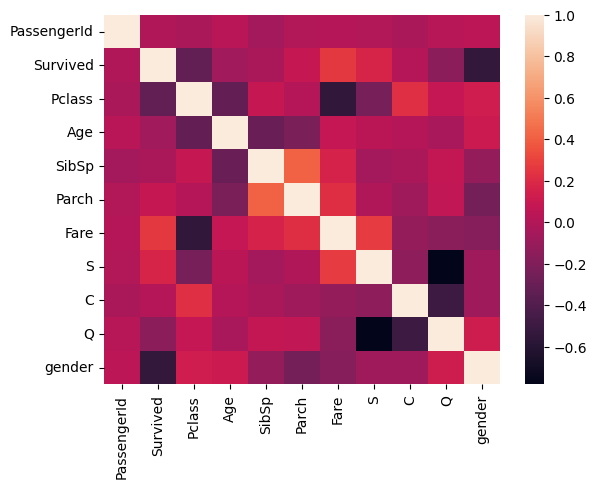

In [106]:
sns.heatmap(resultdf.corr())

In [107]:
resultdf.drop('Fare' , axis =1 ,inplace = True)

In [108]:
from sklearn.linear_model import LogisticRegression

In [115]:
logreg = LogisticRegression(solver = 'liblinear')

In [110]:
from sklearn.model_selection import train_test_split

In [113]:
x_train , x_test ,y_train , ytest = train_test_split( resultdf.drop('Survived' , axis = 1) , resultdf['Survived'])

In [116]:
logreg.fit(x_train , y_train)

LogisticRegression(solver='liblinear')

In [119]:
y_pred = logreg.predict(x_test)

In [120]:
from sklearn.metrics import accuracy_score

In [122]:
acc = accuracy_score(y_pred , ytest)

In [123]:
print("%3f" %acc)

0.793722


In [124]:
from sklearn.model_selection import cross_val_score

In [131]:
score = cross_val_score(logreg , x_train ,y_train ,cv = 5)

In [132]:
from sklearn.metrics import confusion_matrix

In [149]:
resultdf[632:633]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,S,C,Q,gender
632,634,0,1,32.0,0,0,0.0,0.0,1.0,1


In [153]:
testing = np.array(['635','1','28','0','0','0','0','1','1']).astype(float).reshape(1,-1)

In [154]:
predsample = logreg.predict(testing)
predsample

C:\Users\Deependra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [155]:
logreg.predict_proba(testing)

C:\Users\Deependra\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.54377527, 0.45622473]])